# Analysis

In [1]:
# import libraries

import json

import matplotlib.pyplot as plt

In [2]:
# questionnaire sections

categories = [
    'lifestyle',
    'family',
    'health'
]

In [3]:
# data folder

data_folder = '../../../data/questionnaires'

In [4]:
# load questions

questions = {}
for category in categories:
    with open(f"{data_folder}/questions/{category}.json", 'r') as file:
        questions[category] = json.load(file)

In [5]:
# load stats

with open(f"{data_folder}/stats/dynamic_2.json", 'r', encoding='utf-8') as file:
    stats = json.load(file)

In [6]:
# load records

with open(f"{data_folder}/records/dynamic_2.json", 'r') as file:
    records = json.load(file)

In [ ]:
# predictions appended to answers

for record in records.values():
    for item in record:
        if 'prediction' in item:
            factor = item['factor']
            category = factor.split('_', 1)[0]
            stats[category][factor]['count'] += 1
            stats[category][factor]['answers'][item['prediction']] += 1

In [47]:
def factor_selections(category : str) -> None:
    '''
    Displays the amount of selections per factor for the questionnaires
    '''
    factors = list(stats[category].keys())
    counts = [stats[category][factor]["count"] for factor in factors]
    sorted_pairs = sorted(zip(factors, counts), key=lambda x: x[1], reverse=True)
    sorted_factors, sorted_counts = zip(*sorted_pairs)
    plt.figure(figsize=(12, 4))
    plt.bar(sorted_factors, sorted_counts)
    plt.xlabel(f"{category.capitalize()} Factor")
    plt.ylabel('Count')
    plt.title(f"Selections per {category.capitalize()} Factor")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [48]:
def factor_answers(category: str, factor: str) -> None:
    '''
    Displays how much each option was selected for a specific factor
    '''
    question = questions[category][factor]['question']
    options = questions[category][factor]['options']
    answers = stats[category][factor]['answers']
    if options:
        for index in range(len(options)):
            option = options[index]
            words = option.split(' ')
            if len(words) > 3:
                words = ' '.join(words[:3])
                options[index] = words + '...'
        plt.figure(figsize=(8, 4))
        plt.bar(options, answers, color='skyblue')
        plt.xlabel('Options')
        plt.ylabel('Count')
        plt.title(question)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

### Questionnaires

In [49]:
# factors

total_factors = 0
max_factors = 0

for id, details in stats['questionnaires'].items():
    total_factors += details['pred_factors']
    if details['pred_factors'] > max_factors:
        max_factors = details['pred_factors']

average_factors = round(total_factors / len(stats['questionnaires']), 2)

print(f"Average pre-selected factors: {average_factors}")
print(f"Maximum amount of pre-selected factors: {max_factors}")

Average pre-selected factors: 8.49
Maximum amount of pre-selected factors: 16


In [50]:
# average prediction time

total = 0

for id, details in stats['questionnaires'].items():
    total += details['pred_time']

average_time = round(total / len(stats['questionnaires']), 2)

print(f"Average duration of prediction phase: {average_time} s")

Average duration of prediction phase: 16.66 s


In [51]:
# questions

total_questions = 0
max_questions = 0

for id, details in stats['questionnaires'].items():
    total_questions += details['count']
    if details['count'] > max_questions:
        max_questions = details['count']

average_questions = round(total_questions / len(stats['questionnaires']), 2)

print(f"Average questions: {average_questions}")
print(f"Maximum amount of questions: {max_questions}")

Average questions: 15.0
Maximum amount of questions: 15


In [52]:
# average time

total = 0

for id, details in stats['questionnaires'].items():
    total += details['avg_time']

average_time = round(total / len(stats['questionnaires']), 2)

print(f"Average duration of factor selection: {average_time} s")

Average duration of factor selection: 0.94 s


In [53]:
# errors

total_errors = 0
max_errors = 0

for id, details in stats['questionnaires'].items():
    total_errors += details['errors']
    if details['errors'] > max_errors:
        max_errors = details['errors']

average_errors = round(total_errors / len(stats['questionnaires']), 2)

print(f"Total errors: {total_errors}")
print(f"Average errors: {average_errors}")
print(f"Maximum amount of errors: {max_errors}")

Total errors: 0
Average errors: 0.0
Maximum amount of errors: 0


### Lifestyle

In [54]:
# category

category = 'lifestyle'

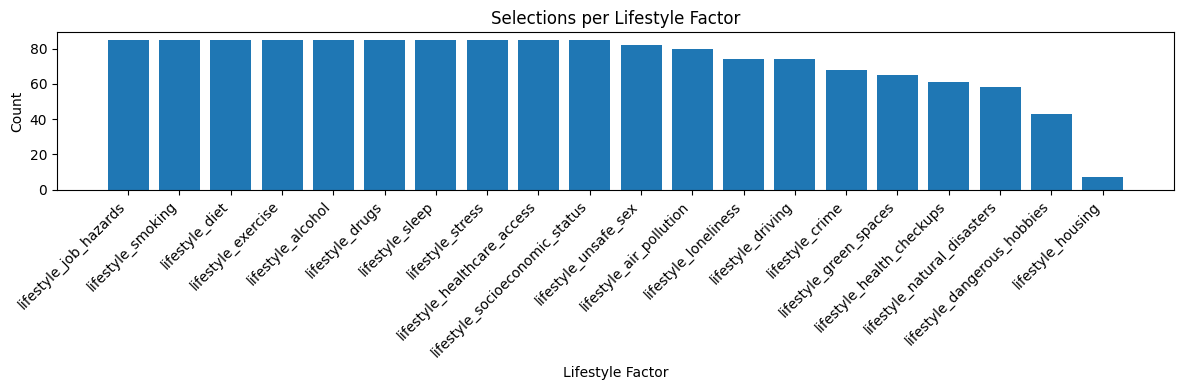

In [55]:
# factor selection

factor_selections(category)

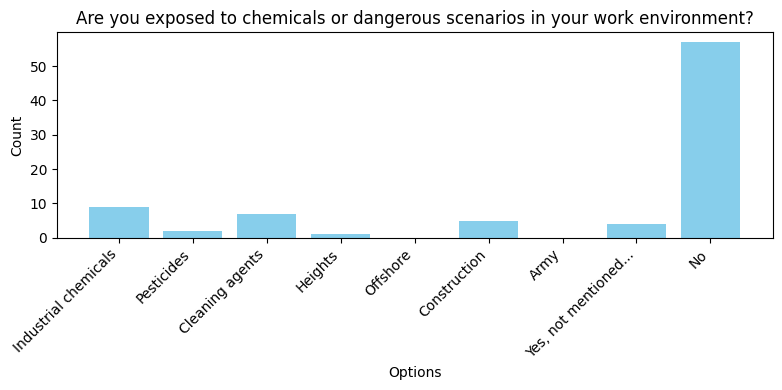

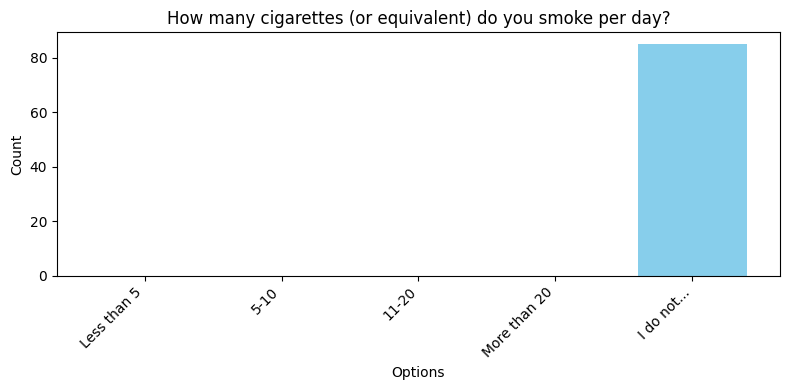

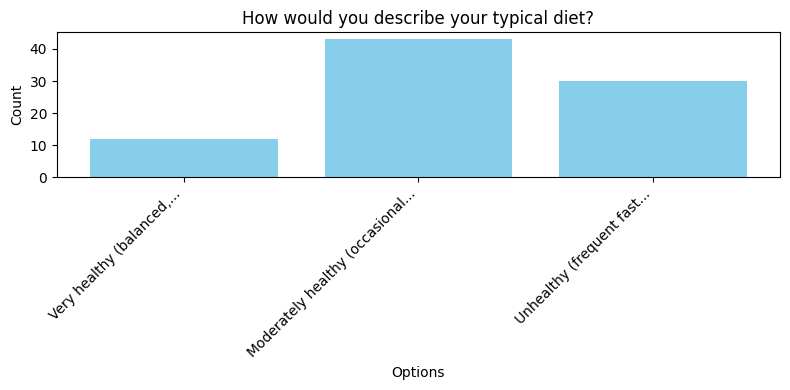

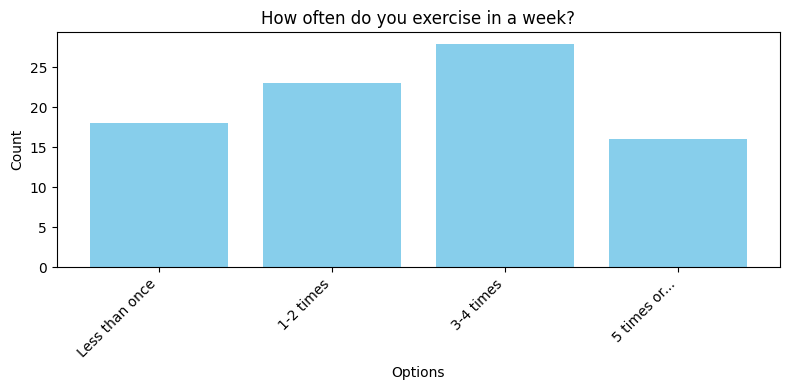

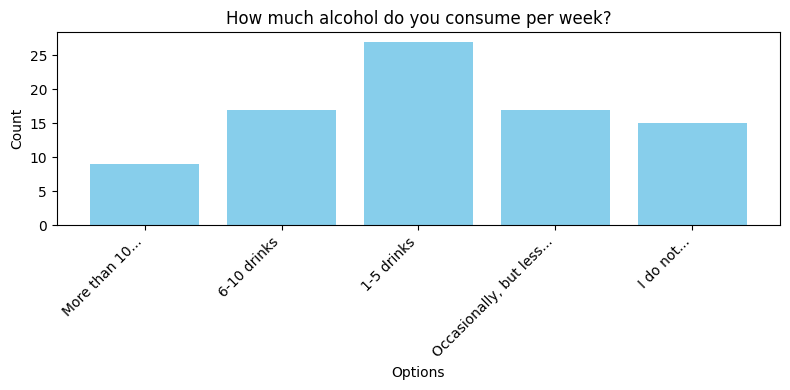

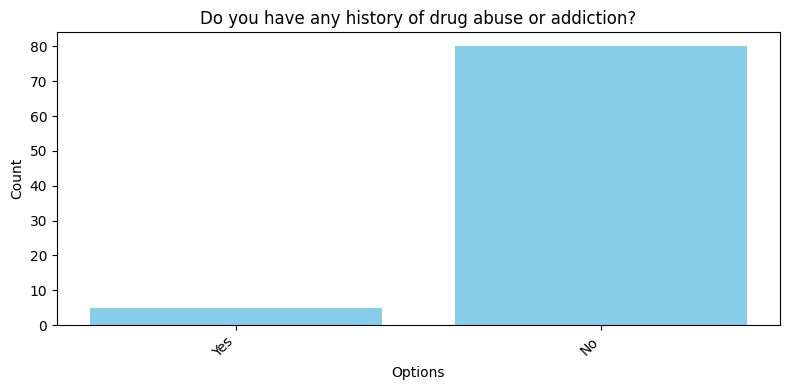

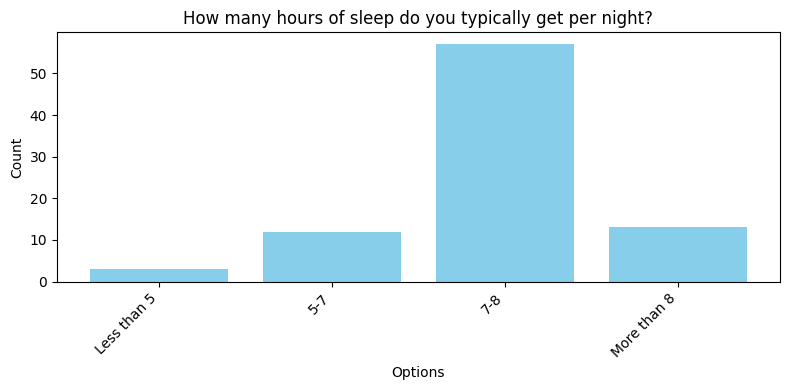

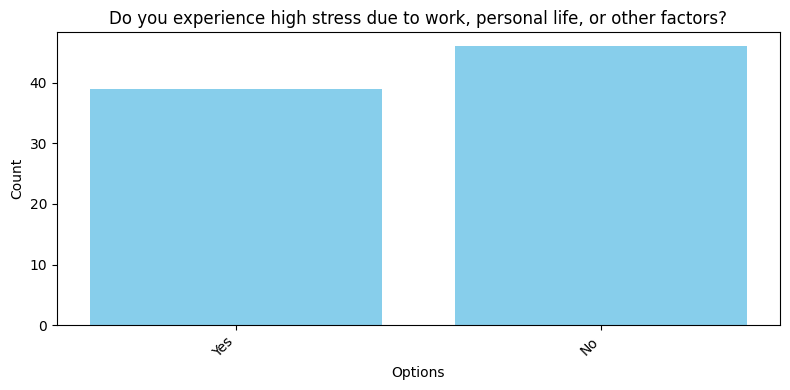

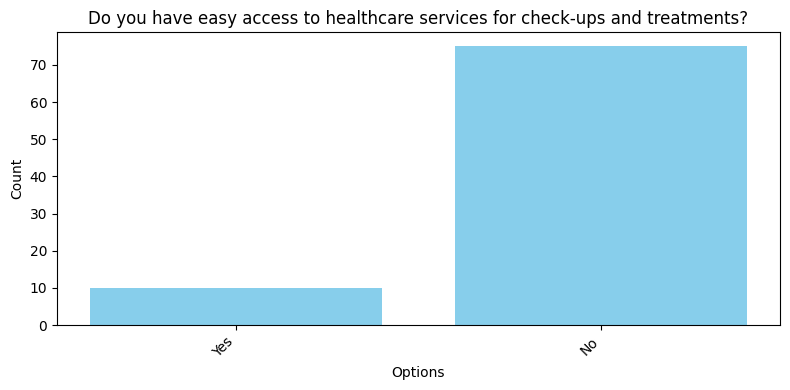

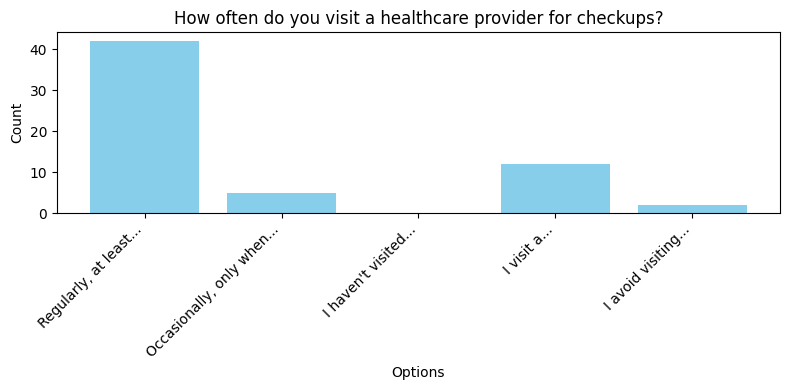

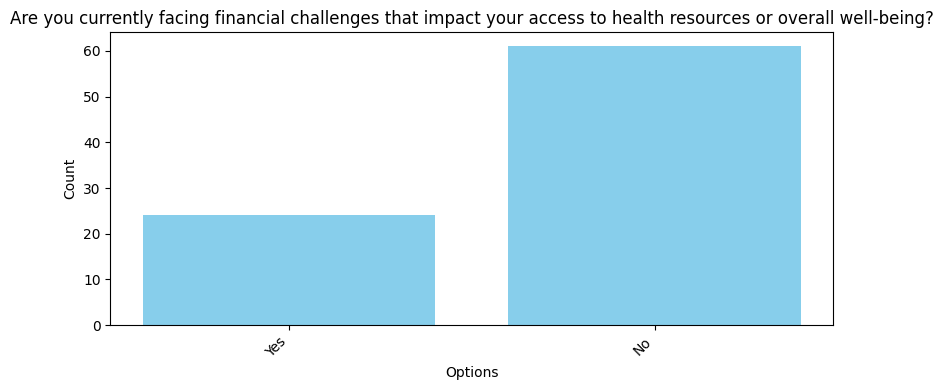

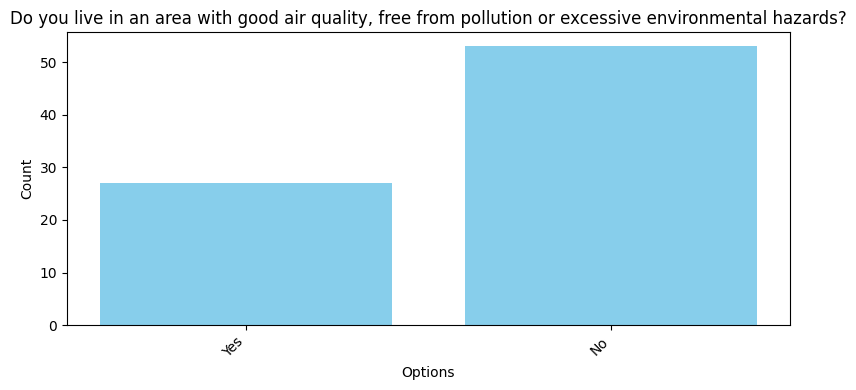

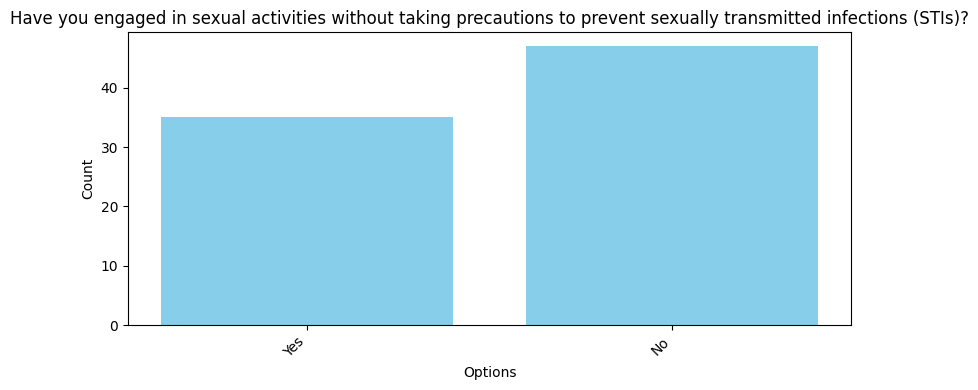

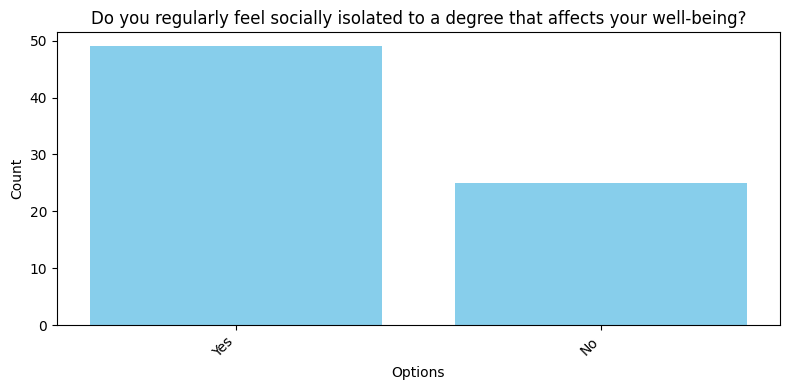

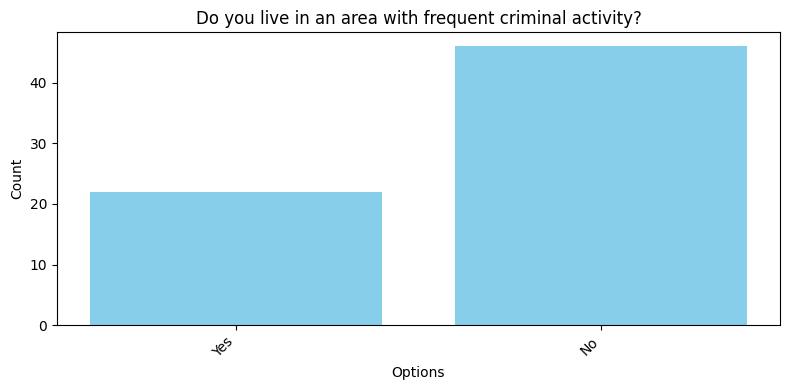

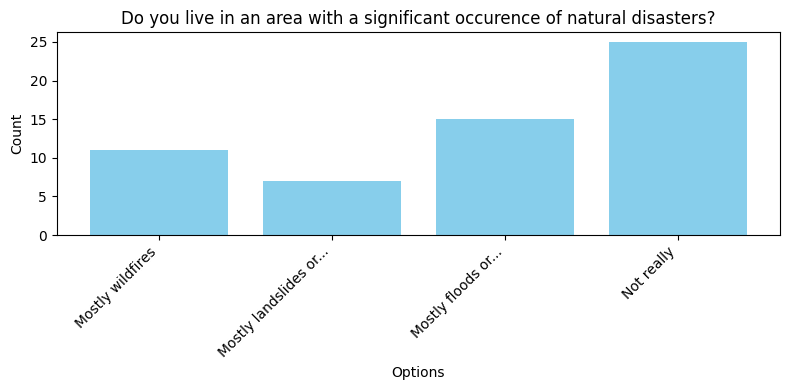

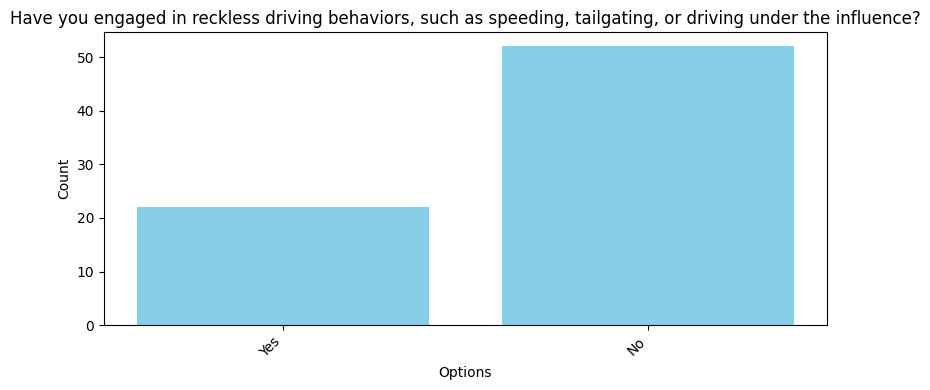

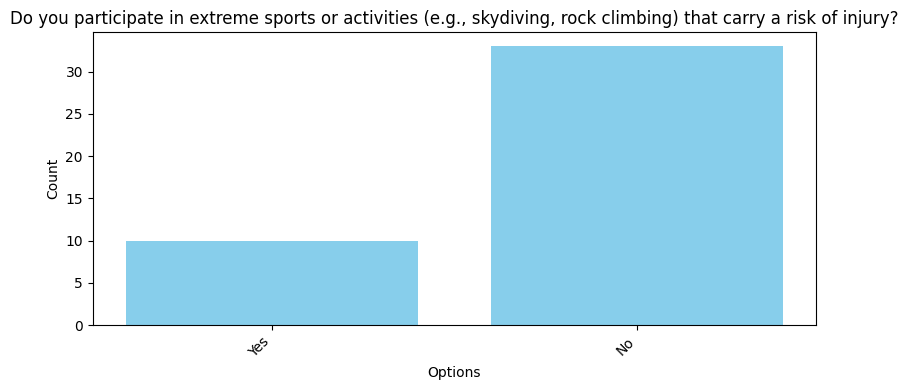

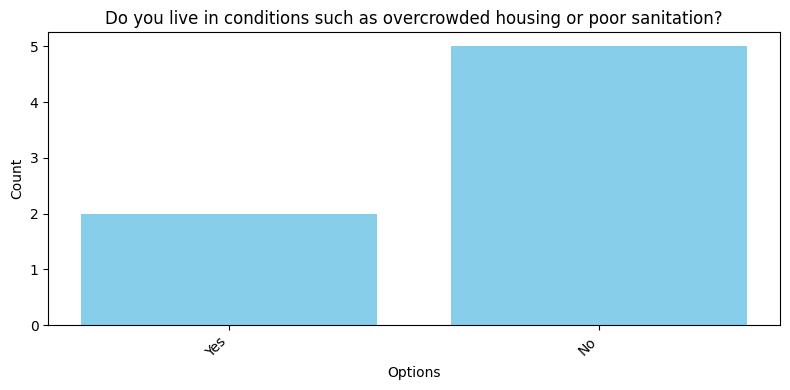

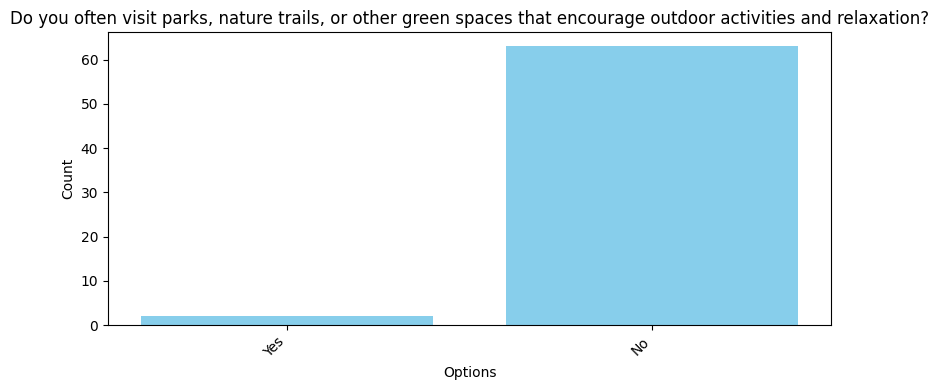

In [56]:
# answers per factor

for factor in questions[category].keys():
    factor_answers(category, factor)

### Family

In [57]:
# category

category = 'family'

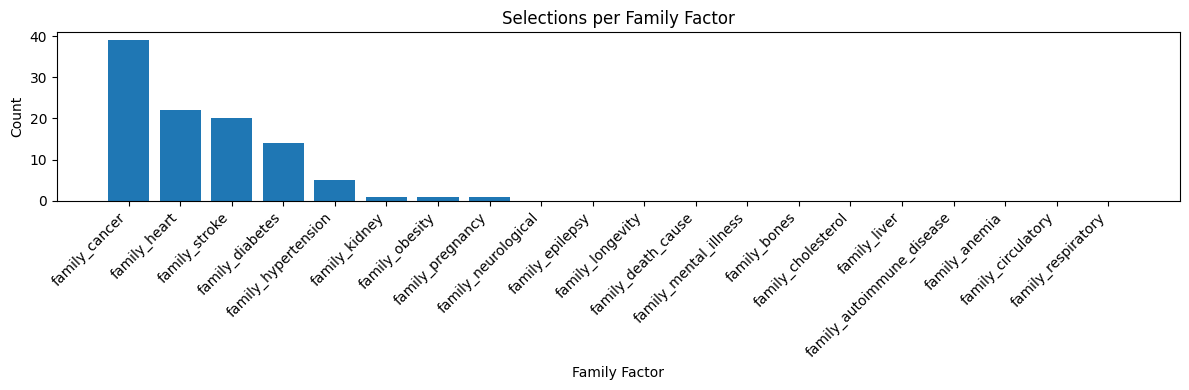

In [58]:
# factor selection

factor_selections(category)

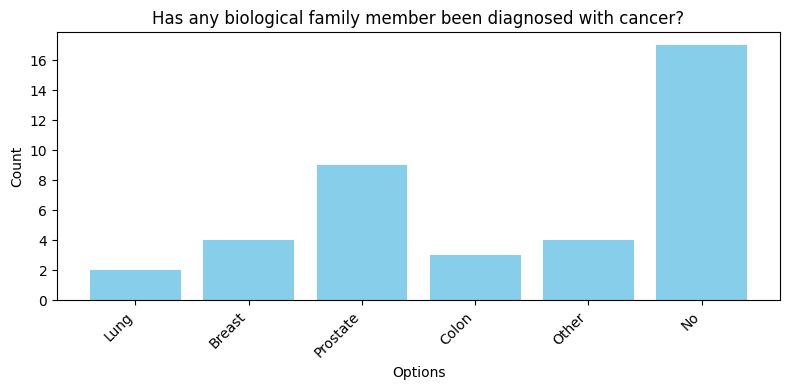

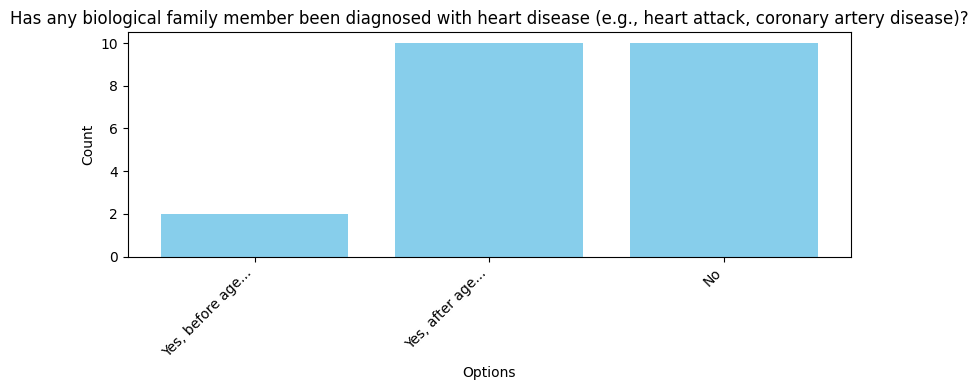

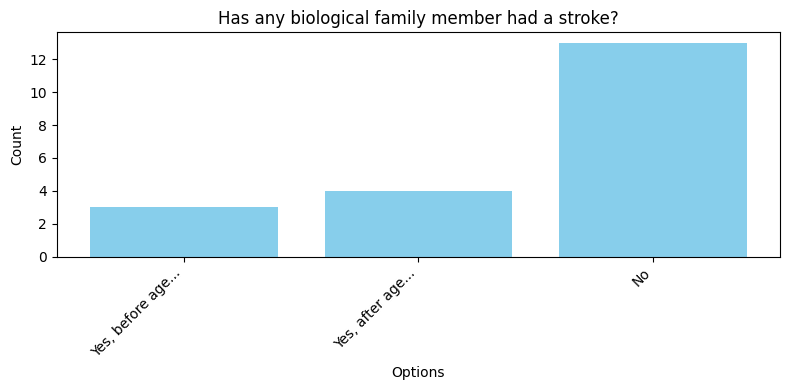

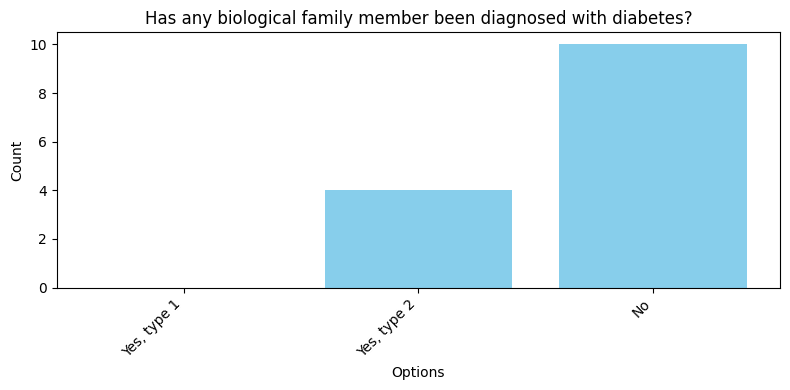

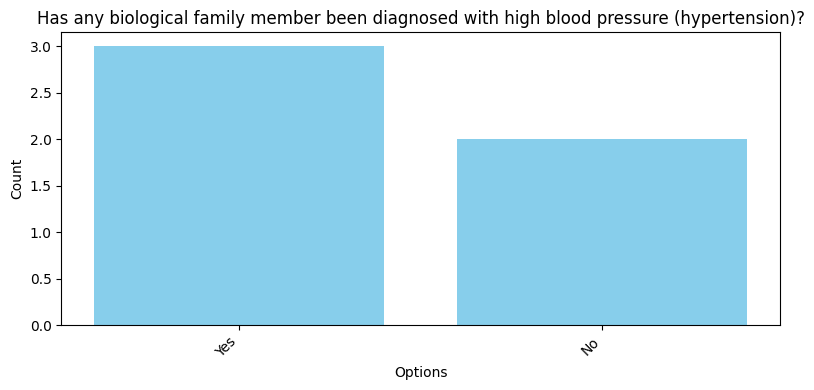

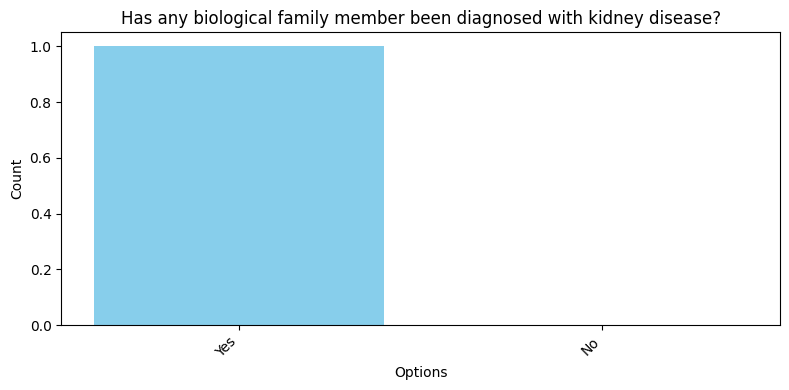

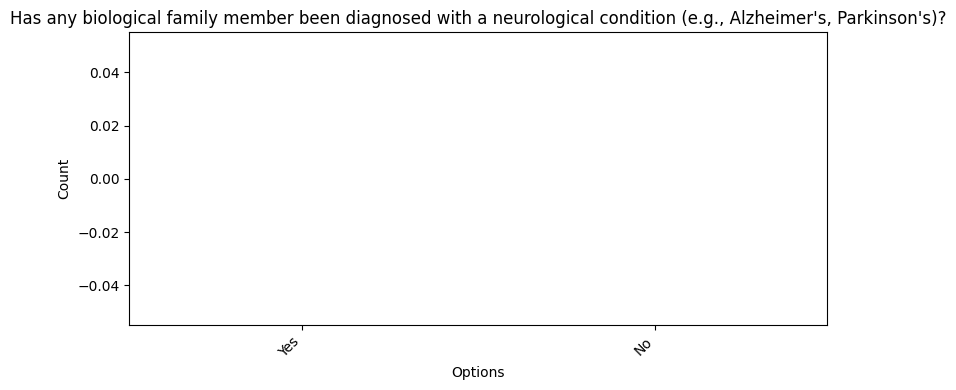

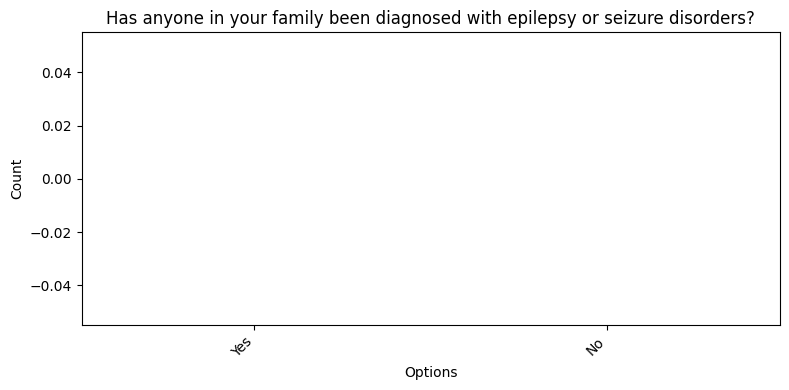

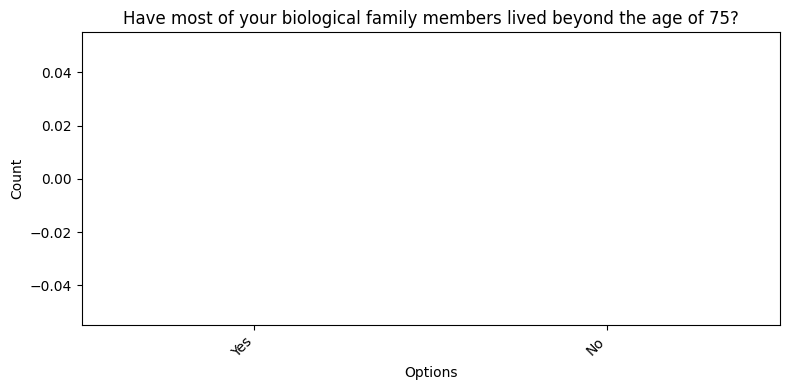

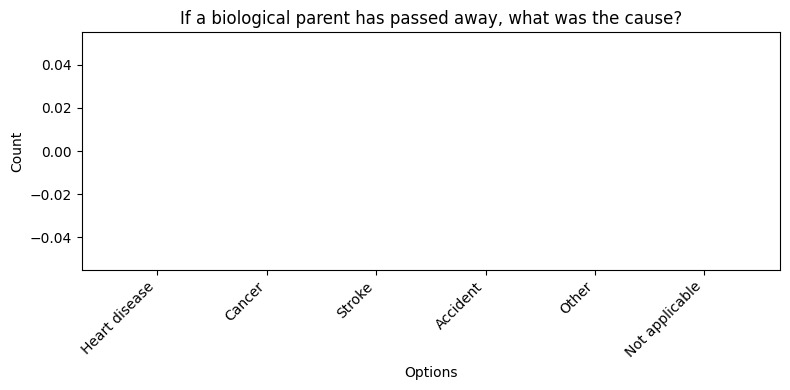

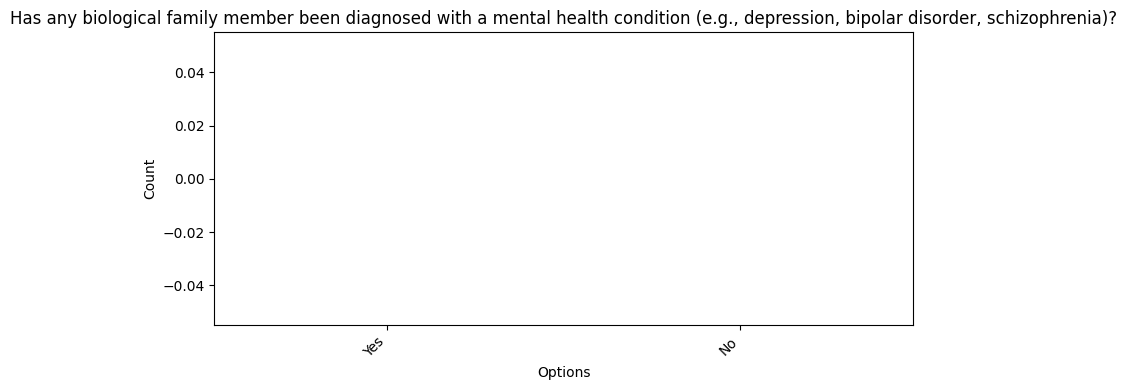

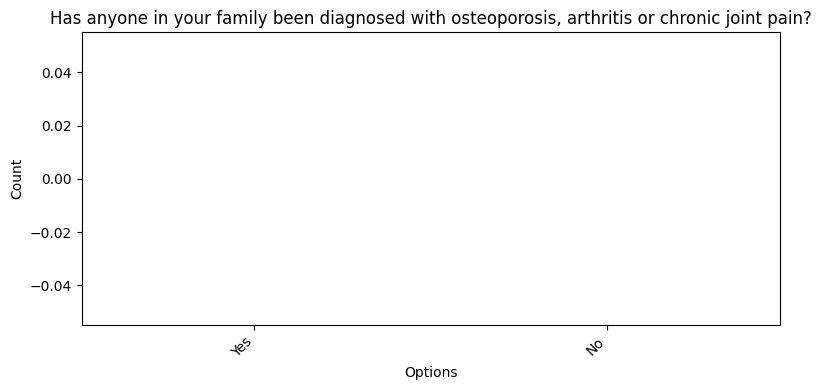

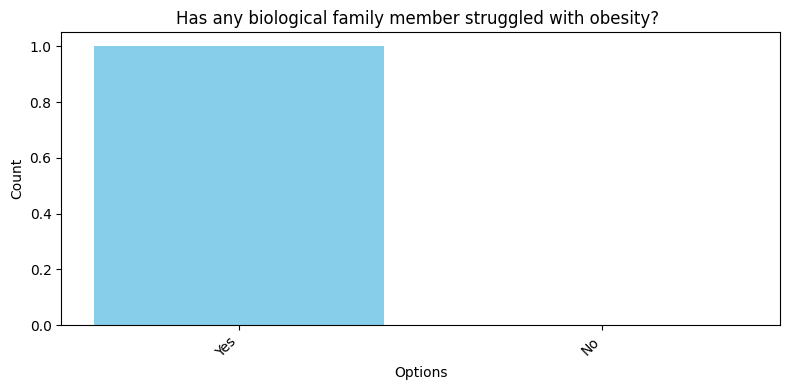

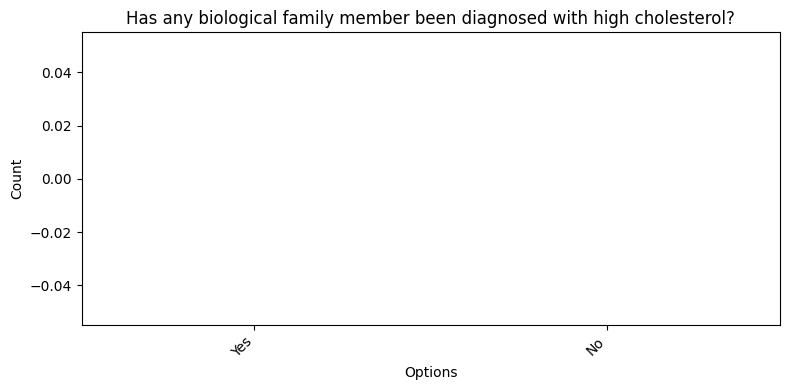

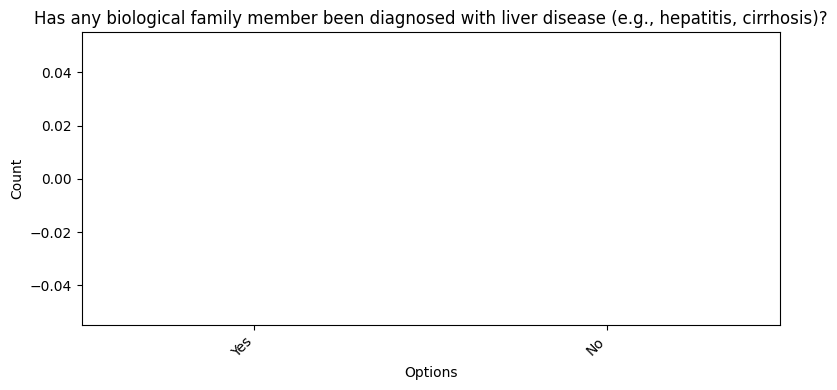

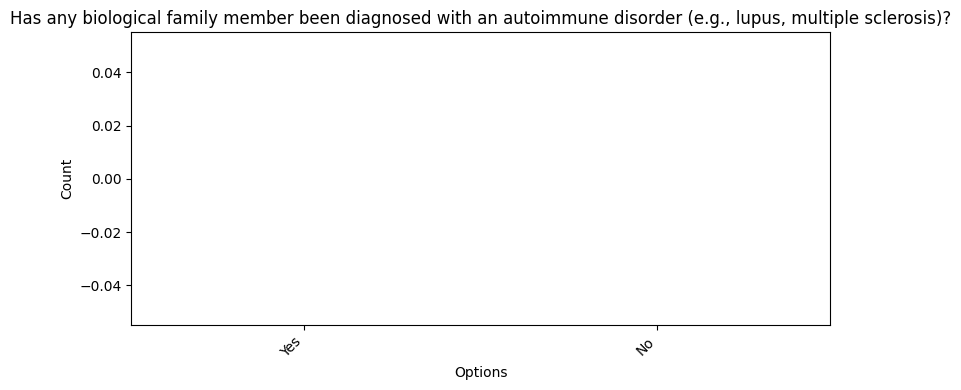

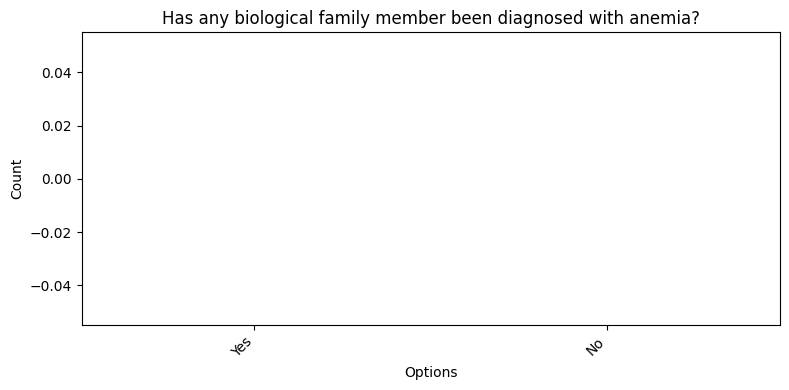

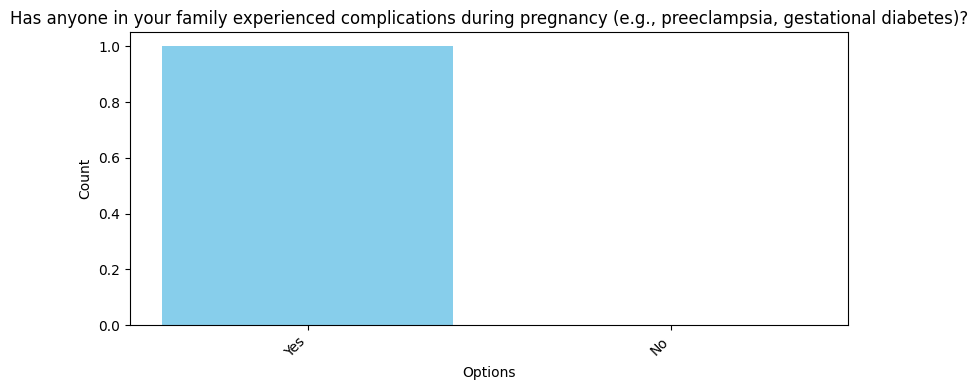

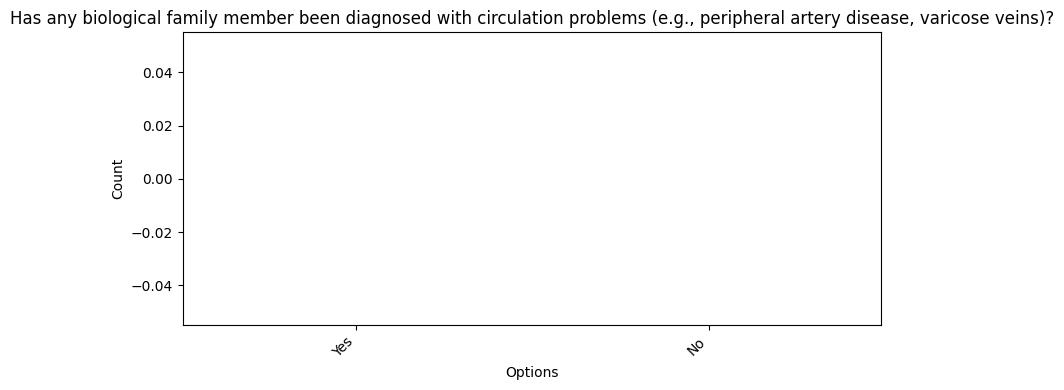

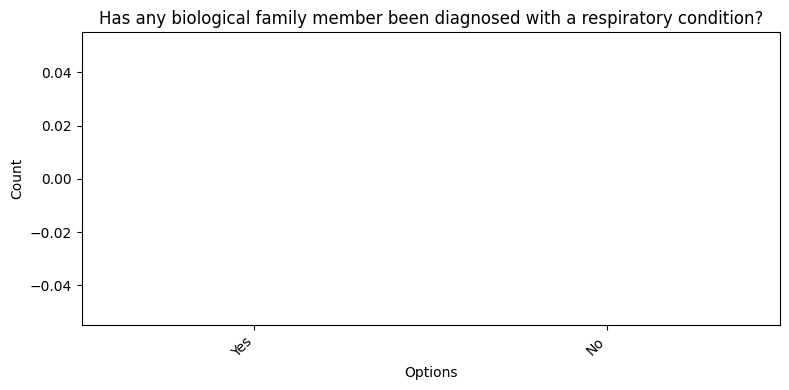

In [59]:
# answers per factor

for factor in questions[category].keys():
    factor_answers(category, factor)

### Health

In [60]:
# category

category = 'health'

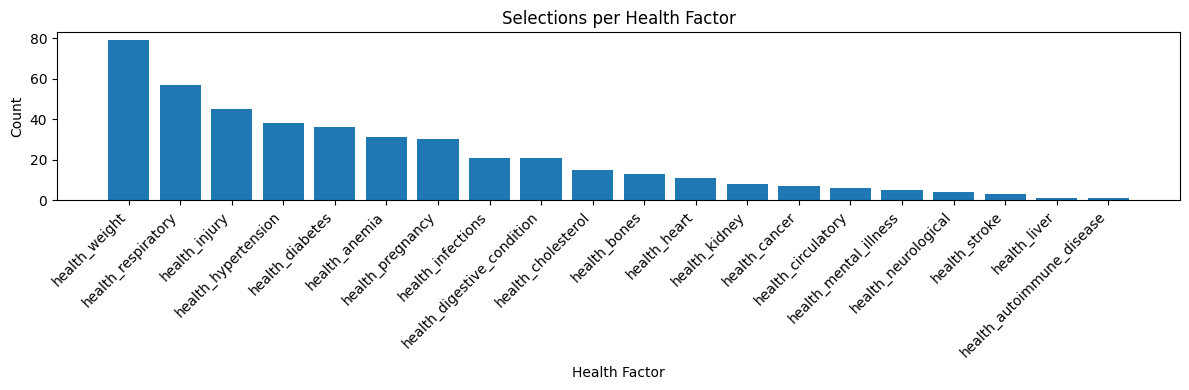

In [61]:
# factor selection

factor_selections(category)

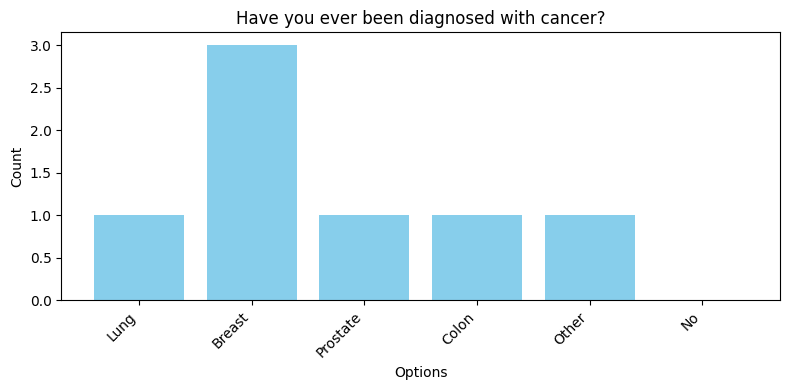

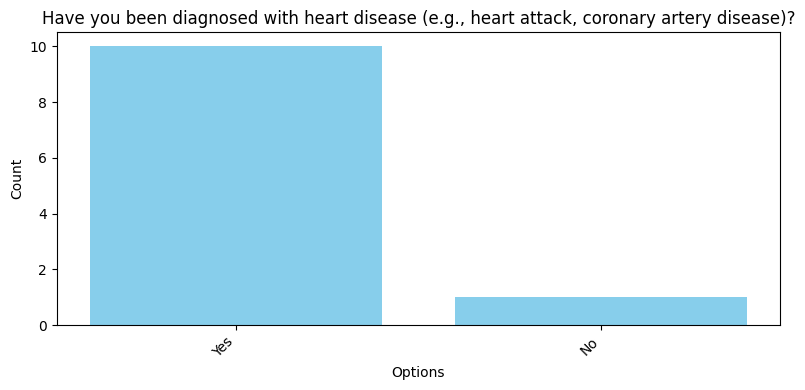

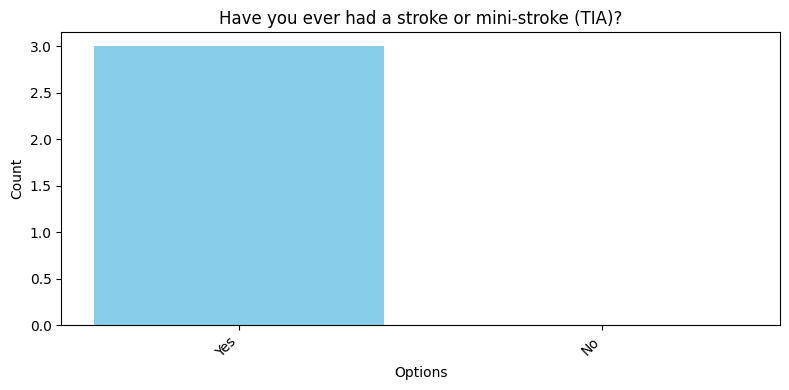

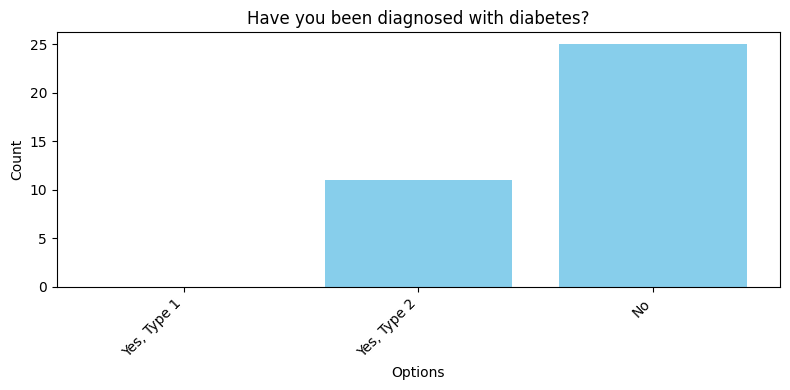

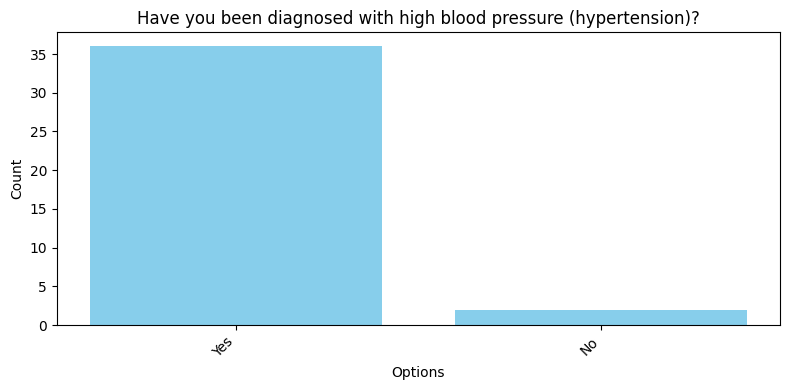

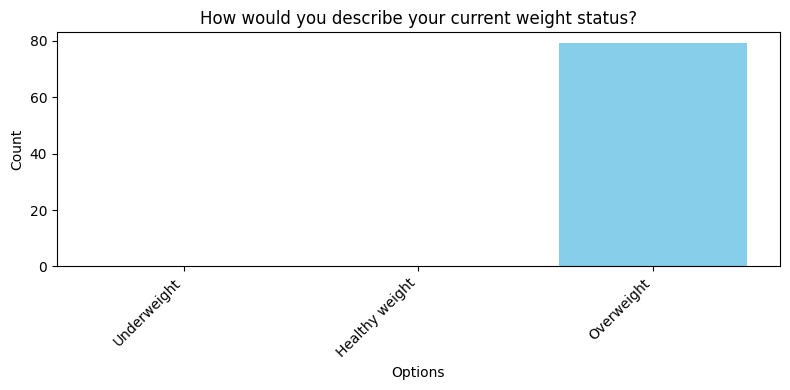

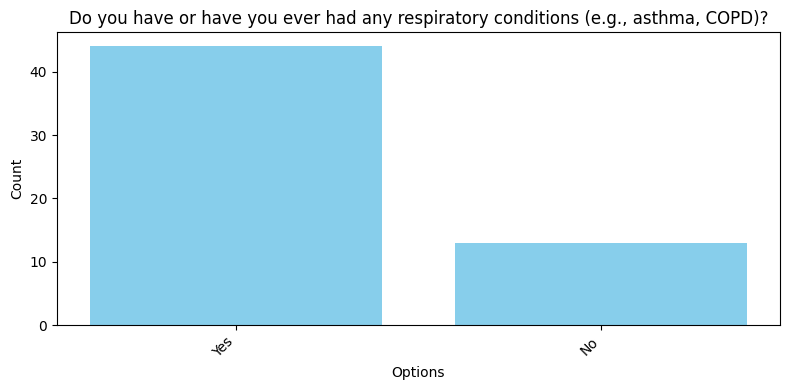

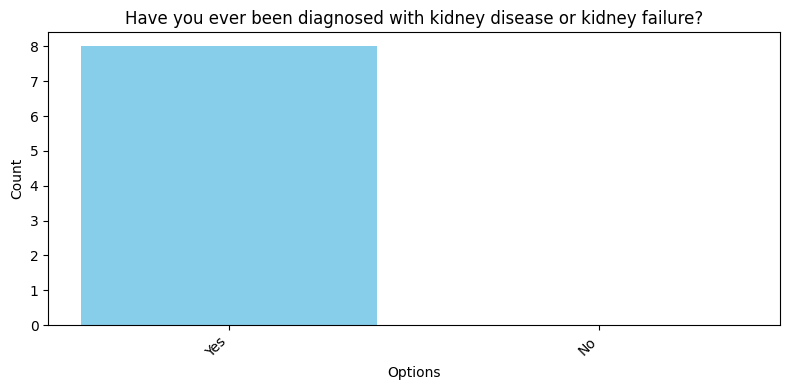

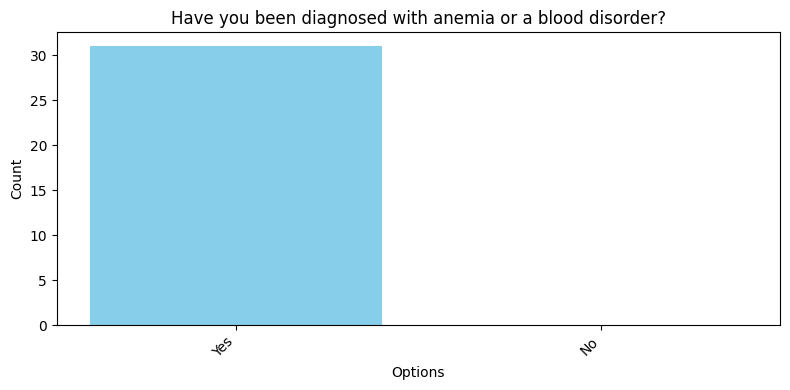

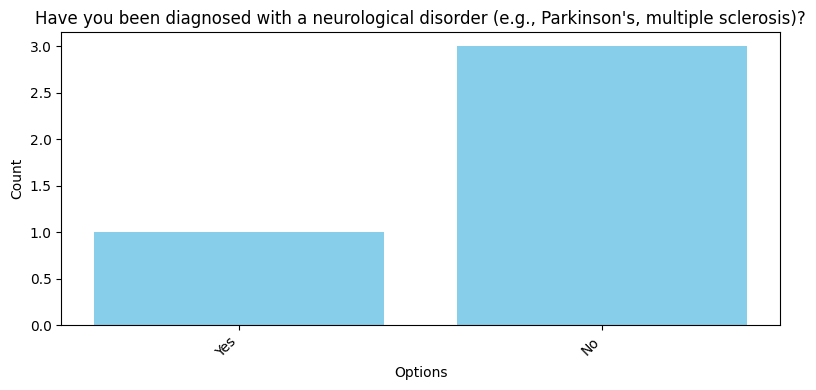

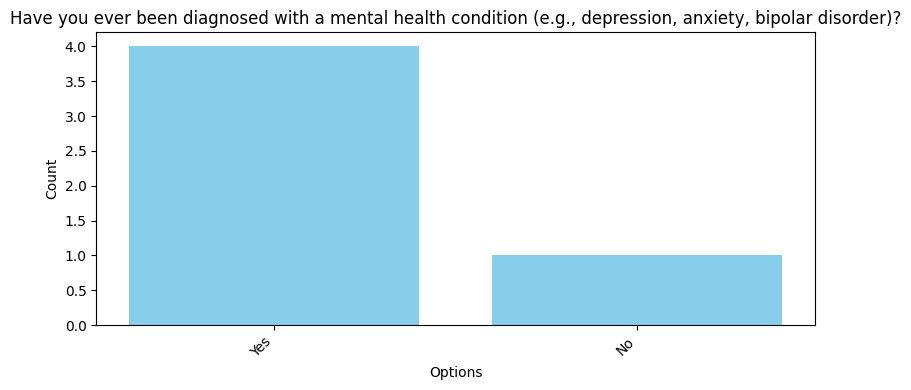

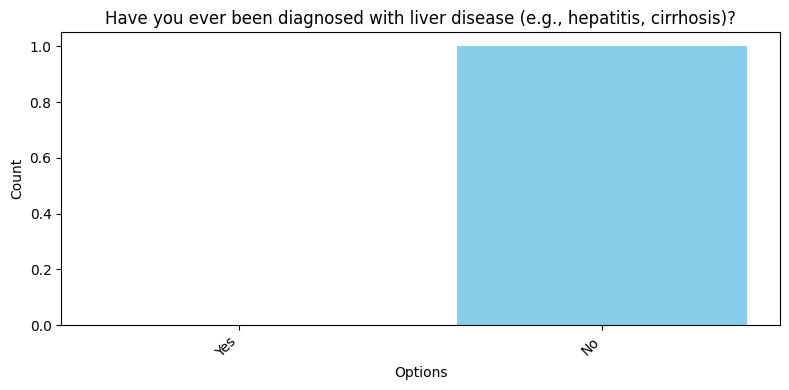

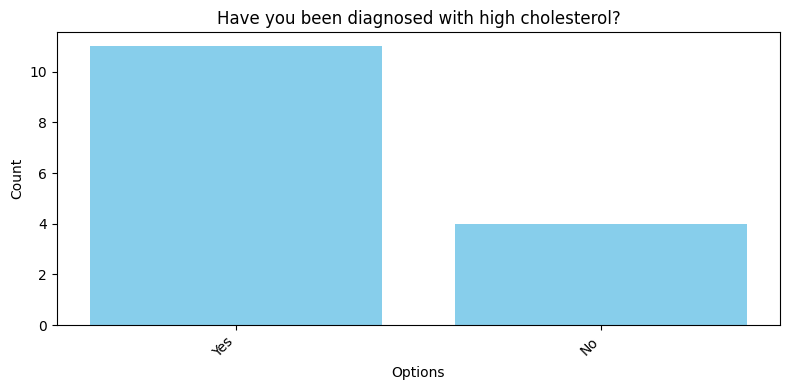

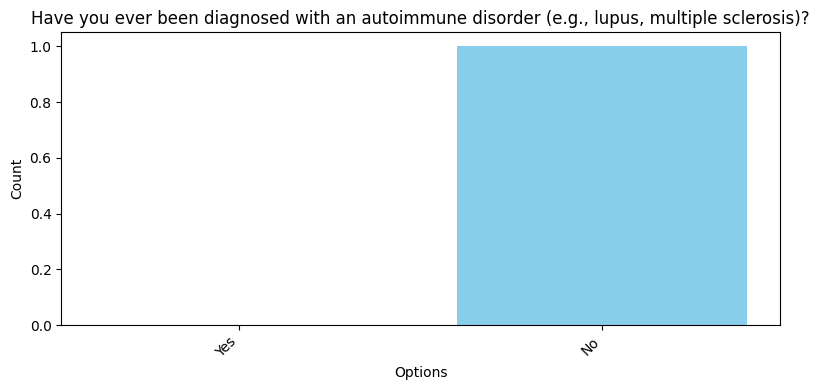

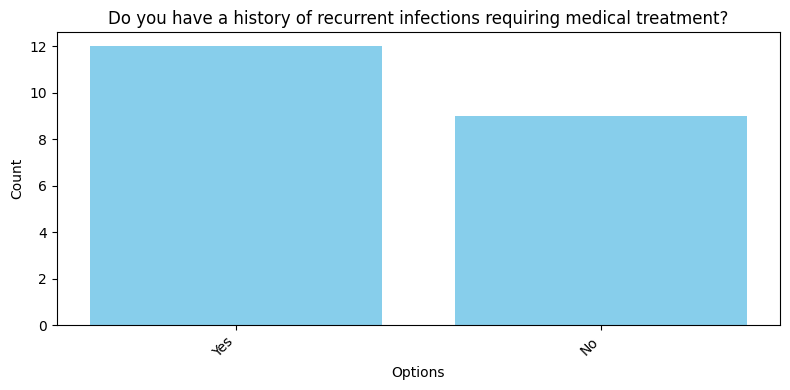

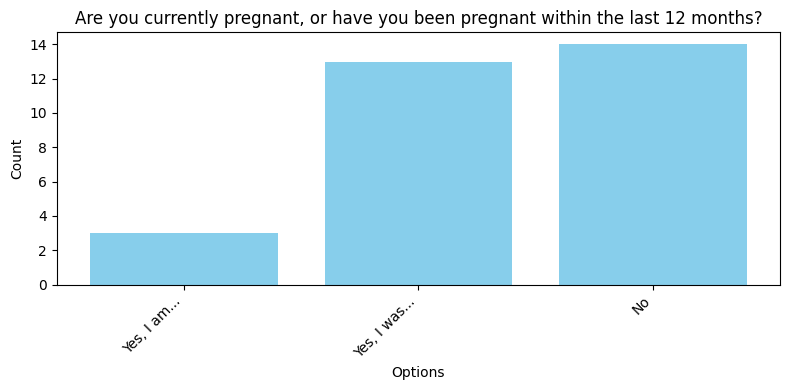

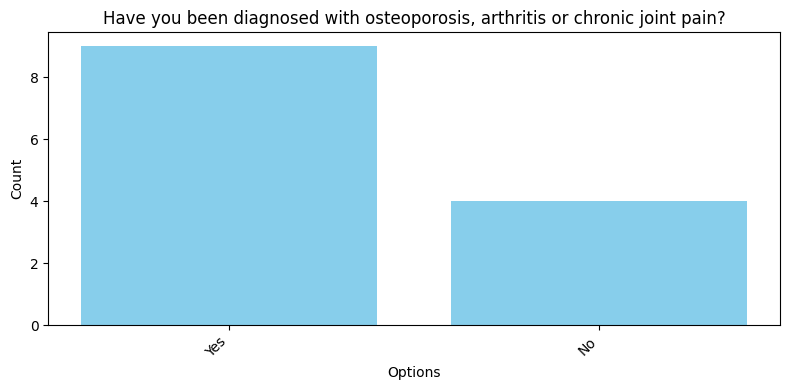

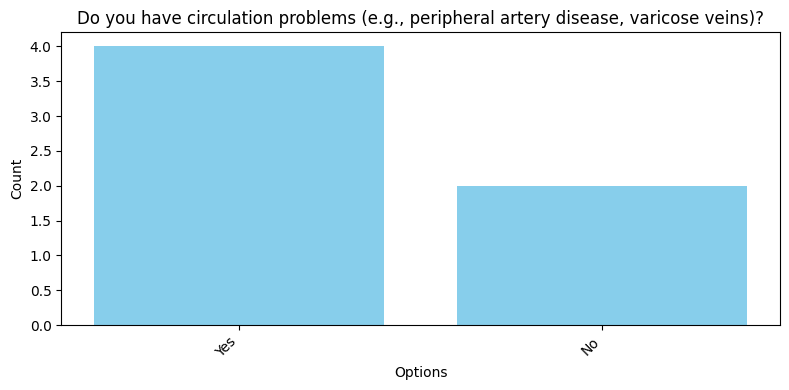

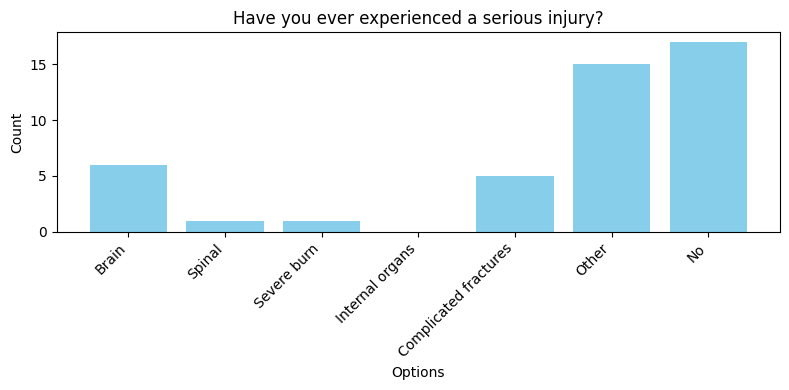

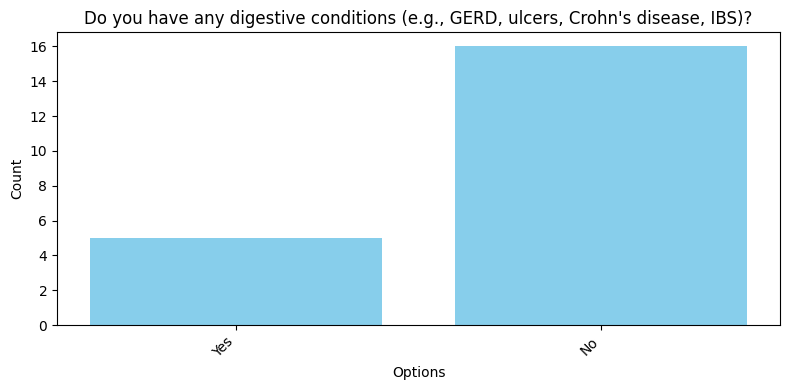

In [62]:
# answers per factor

for factor in questions[category].keys():
    factor_answers(category, factor)